# Cyberbullying Detection and Analysis: NLP Pipeline Report

Group Name : Banter Block <br/>
Student Names : Akanksha Kamath,Hema Vajravelu,Princeton Mascarenhas,Ronik Jayakumar<br/>
Subject Coordinator : Dr.Shibani Antonette


### **Project Objectives and Scope**

The objective of this project was to develop an NLP pipeline for cyberbullying detection and analysis using the chosen dataset from kaggle community. The dataset can be found [here](https://www.kaggle.com/datasets/saurabhshahane/cyberbullying-dataset). The dataset is provided as a `.csv` file with **16309** text posts from Twitter where **32.26% of the tweets were labeled as cyber bullying content**.  The scope of the project included data preprocessing, feature extraction, model training and evaluation, and selecting the best-performing model for cyberbullying detection.

### **1.0 Data Description**

The dataset used in this project consists of social media text posts labeled as cyberbullying or non-cyberbullying. It contains **16309** instances, with features including **'text','annotation' 'oh_label'**. The 'text' column represents the text content of the social media post, 'annotation' represent the type whether it belongs to category sexist/racism/none and the 'oh_label' column represents the corresponding label (1 for cyberbullying, 0 for non-cyberbullying).In this project, we are adapting the data to the specific business context, we will be treating the data as a binary classification problem.

Therefore, the final model will be predicting whether a tweet is bullying or not.

In [4]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!pip install wordcloud
!pip install imblearn
!pip install --upgrade imbalanced-learn
import pandas as pd
from sklearn.utils import resample
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet') 

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, plot_precision_recall_curve
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from collections import Counter
from sklearn import metrics, utils, model_selection, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
import pickle
import time
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Understanding

### 1. Loading Data

In [8]:
#twitter_df = pd.read_csv('D:/UTS/UTS SEM 2/NLP/Assignment/Assignment 2/twitter_parsed_dataset.csv',encoding='UTF-8')
twitter_df = pd.read_csv('twitter_parsed_dataset.csv',encoding='UTF-8')

In [9]:
twitter_df.head(10)

,index,id,Text,Annotation,oh_label,Unnamed: 5
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0,NaN
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0,NaN
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1,NaN
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1,NaN
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0,NaN
5,5.61184804004041E+017,5.61184804004041E+017,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,none,0,NaN
6,4.36563082093949E+017,4.36563082093949E+017,RT @Millhouse66 @Maureen_JS nooo not sexist bu...,sexism,1,NaN
7,5.75962326454641E+017,5.75962326454641E+017,Going to make some pancakes.....Don't hve any ...,))) #MKR,none,NaN
8,5.72581510248706E+017,5.72581510248706E+017,RT @ahtweet: @freebsdgirl How dare you have fe...,none,0,NaN
9,5.00456367719989E+017,5.00456367719989E+017,RT @Newmanzaa: There's something wrong when a ...,sexism,1,NaN


### 2 Data Cleaning and Preparation

##### 2.1 Checking for Null Values

In [10]:
# Storing df in another dataframe
data = pd.DataFrame()
data = twitter_df

In [11]:
#Creating a new column in the dataset to store duplicates boolean values
data['dup'] = data.duplicated(subset=None, keep='first')

In [12]:
data['dup'].value_counts()

False    16849
Name: dup, dtype: int64

In [13]:
data.isnull().sum()

index             0
id                1
Text              2
Annotation        3
oh_label         13
Unnamed: 5    16843
dup               0
dtype: int64

Dropping id,index and Unnamed.These values could affect our predictions

In [14]:
data = data.drop(['Unnamed: 5','dup','id','index'],axis=1)
data

,Text,Annotation,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0
1,@ShreyaBafna3 Now you idiots claim that people...,none,0
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1
4,#mkr No No No No No No,none,0
...,...,...,...
16844,"Feeling so sorry for the girls, they should be...",none,0
16845,#MKR 'pretty good dishes we're happy with' - O...,none,0
16846,RT @colonelkickhead: Deconstructed lemon tart!...,none,0
16847,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0


In [15]:
data.isnull().sum()

Text           2
Annotation     3
oh_label      13
dtype: int64

Dropping rows in Text column,Annotation and oh_label column that have null values. 

In [16]:
data = data.dropna(axis=0)
data

,Text,Annotation,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0
1,@ShreyaBafna3 Now you idiots claim that people...,none,0
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1
4,#mkr No No No No No No,none,0
...,...,...,...
16844,"Feeling so sorry for the girls, they should be...",none,0
16845,#MKR 'pretty good dishes we're happy with' - O...,none,0
16846,RT @colonelkickhead: Deconstructed lemon tart!...,none,0
16847,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0


In [17]:
data.isnull().sum()

Text          0
Annotation    0
oh_label      0
dtype: int64

In the dataset, there are certain rows in Annotation and oh_label columns that contain unnecessary string values. Removing these values to get better predictions                               

In [18]:
filtered_df = data[data['Annotation'].str.contains('racism|sexism|none') == True]
filtered_df = filtered_df[filtered_df['oh_label'].str.contains('0|1') == True]

In [19]:
filtered_df.head(5)

,Text,Annotation,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0
1,@ShreyaBafna3 Now you idiots claim that people...,none,0
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1
4,#mkr No No No No No No,none,0


## 3 Preprocessing Text Data

The original data from `twitter_parsed_data.csv` was cleaned using RegEx.

**Cleaning Steps:**

- Reassigning labels
- Lowercasing tweet text
- Removing hashtags, mentions, quotes and punctuation from tweet text
- Checking for missing values
- Replacing Contractions

In [20]:
def remove_URL(text):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "",str(text))

def remove_atUser(text):
    text = re.sub('@[^\s]+','',str(text))
    return text

def remove_hashtags(text):
    text = re.sub(r'#([^\s]+)', r'', str(text))
    return text

contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
def replaceContractions(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, str(text))
    return text

def remove_MultiplePunctuations(text):
    text = re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', str(text))
    return text

def spellcheck(text):
    text = re.sub(r'(\w)\1+', r'\1', text)
    return text

def remove_numbers(text):
    text = re.sub("\d+", "", text)
    return text

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', str(word)).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def words_from_Text(document):
    stop_words_new = ['multiexclamation','multiquestion','multistop','url','atuser','rt','mkr','st','rd','nd','th','am','pm','RT','MKR','atUser']
    import re
    stopwords = ['atUser', 'url', 'MRK','RT']
    #df['clean_text'] = df['text'].apply(lambda x: ' '.join([word.lower() for word in re.split(r'\W+', x) if word.lower() not in stopwords and word.isalpha()]))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval_1 = ''.join([i for i in document.lower().split() if i not in stop_words_new])
    punctuationremoval_1 = ''.join(ch for ch in stopwordremoval_1 if ch not in exclude)
    normalized_1 = " ".join(lemma.lemmatize(word) for word in punctuationremoval_1.split())
    return normalized_1

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    stopwords_new = ['atUser', 'url', 'MKR','RT','rt','mkr']
    stpwrd = nltk.corpus.stopwords.words('english')
    stpwrd.extend(stopwords_new)
    print(stpwrd)
    new_words = []
    for word in words:
        if word not in stpwrd:
            new_words.append(word)
    return new_words

def unique(list1):
   # intilize a null list
     unique_list = []
   # traverse for all elements
     for x in list1:
         # check if exists in unique_list or not
         if x not in unique_list:
              unique_list.append(x)
     return unique_list


In [21]:
filtered_df['Text'] = filtered_df['Text'].apply(remove_URL)
filtered_df['Text'] = filtered_df['Text'].apply(remove_atUser)
filtered_df['Text'] = filtered_df['Text'].apply(remove_hashtags)
filtered_df['Text'] = filtered_df['Text'].apply(replaceContractions)
filtered_df['Text'] = filtered_df['Text'].apply(spellcheck)
filtered_df['Text'] = filtered_df['Text'].apply(remove_MultiplePunctuations)
filtered_df

,Text,Annotation,oh_label
0,I read them in context.No change in meaning...,none,0
1,Now you idiots claim that people who tried to...,none,0
2,"RT Cal me sexist, but when I go to an auto pl...",sexism,1
3,"Wrong, ISIS folows the example of Mohamed and...",racism,1
4,No No No No No No,none,0
...,...,...,...
16844,"Feling so sory for the girls, they should be s...",none,0
16845,"'prety god dishes we are hapy with' - OK, wel...",none,0
16846,RT Deconstructed lemon tart.can we please go ...,none,0
16847,You are to stupid to talk to. Blocked.,none,0


After pre-procesing our text data, certain stopwords like 'RT','mkr' continued to exist. Let us remove them manually to get better results for our visualisations

In [22]:
stopwords = ['atUser', 'url', 'MRK','rt','im','cannot','canot']
filtered_df['Text'] = filtered_df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]+', '', x)) ##to remove non-alphabetic characters
filtered_df['Text'] = filtered_df['Text'].apply(lambda x: re.sub(r'(\w)\1+', r'\1', x)) ##to remove repeated characters "okkkkkkkkkk,welcomeeeeeeeeeeeeee"
filtered_df['Text'] = filtered_df['Text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stopwords])) ##to remove the stopwords we wanted

In [23]:
filtered_df.head(5)

,Text,Annotation,oh_label
0,i read them in contextno change in meaning the...,none,0
1,now you idiots claim that people who tried to ...,none,0
2,cal me sexist but when i go to an auto place i...,sexism,1
3,wrong isis folows the example of mohamed and t...,racism,1
4,no no no no no no,none,0


### 4.0 Text Evaluation

We may begin our text analysis now that we have clean data frames.You can see a method employed from a source alluded to in text analysis research [1]. 
This typical text preprocessing approach involves removing all stopword indications other than letters, altering the case of the text to lower case, and stemming or lemmatizing the words.

##### Stopword: 
Stop words are the most common terms in any language that make no sense, and NLP normally ignores them. In English, stop terms include "a," "and," "the," and "of." Stop words are routinely removed from texts in NLP before they are evaluated. This is done to condense the text and remove unnecessary information. [2]

#### Lemmatization: 
The process of constructing numerous inflected variants of a single word is known as lemmatization. Artificial linguistics, chatbots, and natural language processing (NLP) all make use of it. Lemmatization is the process of combining words with similar meanings into a single word, which improves the usefulness and precision of technologies such as chatbots and search engine searches.[3]

For example, the phrases "was," "is," and "will be" can all be lemmatized to the word "be." Just as "good" can be lemmatized, so can "better" and "best."[4] 

#### Stemming: 
The natural language processing method known as stemming helps to prepare text, words, and documents for text normalisation by reducing word inflection to its root forms.[5]

In [181]:
stop_words = []

# A text file containing the most common stop words
#with open('D:/UTS/UTS SEM 2/NLP/Assignment/Assignment 2/Stopwords_List.txt', "r") as f:
with open('Stopwords_List.txt', "r") as f:
    for line in f:
        stop_words.extend(line.split())

def pre_process(raw_text):
    """
    This function splits the text to  single words, removing stopwords and doing the lemmatization to each word
    parameters:
    raw_text: text to split to single words
    """
    #regular expression keeping only letters - more on them later
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer()
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

As you can see from the code above, we utilised the Portstemmer() function.

It's a stemmer that's mostly utilised for information retrieval and data mining. Because its apps only support the English language. It is based on the premise that the suffixes of the English language are made up of smaller and simpler suffixes, and it is largely known for its speed and simplicity. The advantage is that it produces the best results and has a lower error rate than other stemmers.[11]

In [ ]:
test_sentence = "My name is Prinston and I'm using this sentence to see if my function works properly..."

pre_process(test_sentence)

In [ ]:
filtered_df['pre_processed_text'] = filtered_df['Text'].apply(pre_process)
filtered_df.head(5)

Creating a new column that contains the most unique words

In [26]:
df = filtered_df
df.head()

,Text,Annotation,oh_label
0,i read them in contextno change in meaning the...,none,0
1,now you idiots claim that people who tried to ...,none,0
2,cal me sexist but when i go to an auto place i...,sexism,1
3,wrong isis folows the example of mohamed and t...,racism,1
4,no no no no no no,none,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16309 entries, 0 to 16848
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        16309 non-null  object
 1   Annotation  16309 non-null  object
 2   oh_label    16309 non-null  object
dtypes: object(3)
memory usage: 509.7+ KB


As seen above, our target variable 'oh_label' is of type object. Let us convert this to integer type since it would help us in our further calculations

In [28]:
df['oh_label'] = df['oh_label'].astype(np.int64)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16309 entries, 0 to 16848
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        16309 non-null  object
 1   Annotation  16309 non-null  object
 2   oh_label    16309 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 509.7+ KB


In [30]:
df.isnull().sum()

Text          0
Annotation    0
oh_label      0
dtype: int64

In [31]:
df.shape

(16309, 3)

In [32]:
df['Annotation'].unique()

array(['none', 'sexism', 'racism'], dtype=object)

In [33]:
df['oh_label'].unique()

array([0, 1], dtype=int64)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16309 entries, 0 to 16848
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        16309 non-null  object
 1   Annotation  16309 non-null  object
 2   oh_label    16309 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 509.7+ KB


### 5.Checking Class Imbalance of Original Data's Labels

#### EDA on Annotation Column
We can see majority belongs to none ,but few percentage adds to racism and sexist categories which we are mainly intested in.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Class')

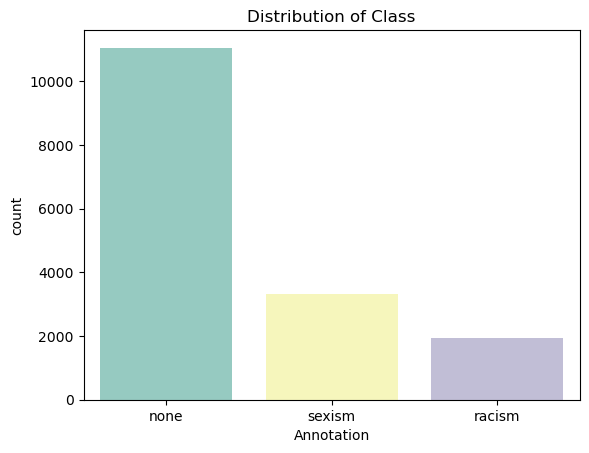

In [35]:
sns.countplot(df['Annotation'], palette='Set3').set_title('Distribution of Class')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Class')

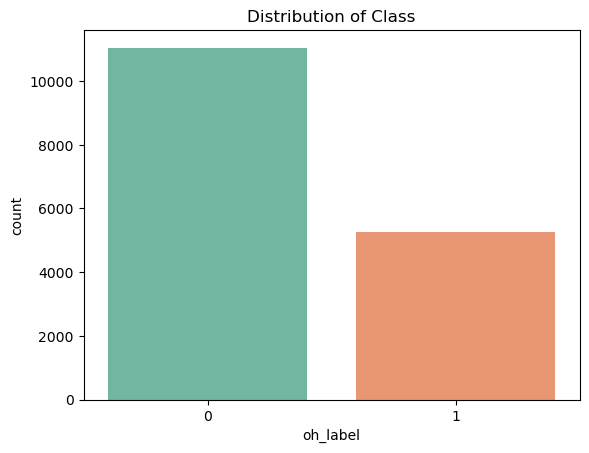

In [36]:
sns.countplot(df['oh_label'], palette='Set2').set_title('Distribution of Class')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


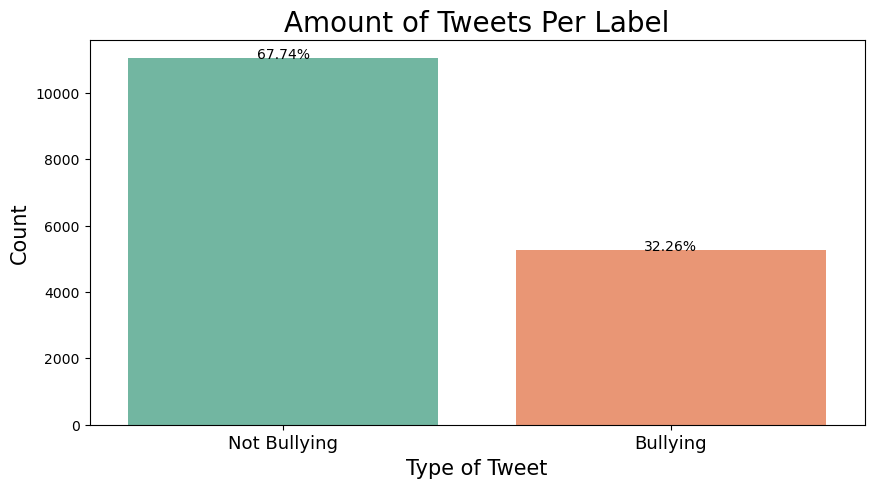

In [37]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['oh_label'], palette='Set2')

ax.set_title('Amount of Tweets Per Label',fontsize = 20)
ax.set_xlabel('Type of Tweet',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
ax.set_xticklabels(['Not Bullying','Bullying'],fontsize = 13)

total = float(len(df)) # one person per row 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total * 100) + '%',
            ha="center") 

In [38]:
df['oh_label'].sum() / len(df['oh_label'])

0.32258262309154456

###  We can infer that 32% of data is actual bullying from the distribution

In [39]:
clean_df = df.copy()

In [40]:
clean_df.head()

,Text,Annotation,oh_label
0,i read them in contextno change in meaning the...,none,0
1,now you idiots claim that people who tried to ...,none,0
2,cal me sexist but when i go to an auto place i...,sexism,1
3,wrong isis folows the example of mohamed and t...,racism,1
4,no no no no no no,none,0


In [43]:
clean_df.isnull().sum()

Text          0
Annotation    0
oh_label      0
dtype: int64

In [44]:
clean_df['clean_tweets'] = clean_df['Text']
clean_df

,Text,Annotation,oh_label,clean_tweets
0,i read them in contextno change in meaning the...,none,0,i read them in contextno change in meaning the...
1,now you idiots claim that people who tried to ...,none,0,now you idiots claim that people who tried to ...
2,cal me sexist but when i go to an auto place i...,sexism,1,cal me sexist but when i go to an auto place i...
3,wrong isis folows the example of mohamed and t...,racism,1,wrong isis folows the example of mohamed and t...
4,no no no no no no,none,0,no no no no no no
...,...,...,...,...
16844,feling so sory for the girls they should be sa...,none,0,feling so sory for the girls they should be sa...
16845,prety god dishes we are hapy with ok wel never...,none,0,prety god dishes we are hapy with ok wel never...
16846,deconstructed lemon tartcan we please go just ...,none,0,deconstructed lemon tartcan we please go just ...
16847,you are to stupid to talk to blocked,none,0,you are to stupid to talk to blocked


In [45]:
clean_df = clean_df.drop(["Text"], axis = 1)

In [46]:
clean_df

,Annotation,oh_label,clean_tweets
0,none,0,i read them in contextno change in meaning the...
1,none,0,now you idiots claim that people who tried to ...
2,sexism,1,cal me sexist but when i go to an auto place i...
3,racism,1,wrong isis folows the example of mohamed and t...
4,none,0,no no no no no no
...,...,...,...
16844,none,0,feling so sory for the girls they should be sa...
16845,none,0,prety god dishes we are hapy with ok wel never...
16846,none,0,deconstructed lemon tartcan we please go just ...
16847,none,0,you are to stupid to talk to blocked


In [47]:
tweet_df = clean_df[['clean_tweets', 'oh_label']].copy()

In [48]:
tweet_df.head()

,clean_tweets,oh_label
0,i read them in contextno change in meaning the...,0
1,now you idiots claim that people who tried to ...,0
2,cal me sexist but when i go to an auto place i...,1
3,wrong isis folows the example of mohamed and t...,1
4,no no no no no no,0


In [49]:
tweet_df.shape

(16309, 2)

In [50]:
data = tweet_df['clean_tweets']
target = tweet_df['oh_label']

###  5.1 Tokenizing Before Removing Stop Words

In [51]:
# function to tokenize without removing stop words
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.collocations import *
def unfiltered_tokens(text):
    dirty_tokens = nltk.word_tokenize(text)
    return dirty_tokens

In [52]:
# applying this function to the `clean_tweets` column
unfilterd_data = list(map(unfiltered_tokens, data))

In [53]:
# morphing `unfiltered_data` into a readable list
flat_unfiltered = [item for sublist in unfilterd_data for item in sublist]

In [54]:
# getting frequency distribution
dirty_corpus_freqdist = FreqDist(flat_unfiltered)
# top 20 words in the corpus
dirty_corpus_freqdist.most_common(20)

[('the', 7280),
 ('is', 6232),
 ('to', 5390),
 ('a', 4683),
 ('i', 4559),
 ('not', 4330),
 ('and', 4042),
 ('of', 3894),
 ('you', 3313),
 ('that', 3071),
 ('are', 2860),
 ('it', 2840),
 ('in', 2531),
 ('but', 1853),
 ('for', 1795),
 ('have', 1703),
 ('they', 1666),
 ('do', 1633),
 ('on', 1466),
 ('this', 1428)]

### 5.2 Removing Stop Words in Tokenization

In [55]:
stop_words = set(stopwords.words('english'))

In [56]:
def process_tweet(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [57]:
# applying the above function to our data/features 
processed_data = list(map(process_tweet, data))

In [58]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

14852

Here we can see that our corpus has a vocabulary of **16212**. This would also be the number of columns in the sparse matrix after we vectorize the data later.

Now that the stop words are removed and the corpus is tokenized, let's take a look at the top words in this corpus

In [59]:
# morphing `processed_data` into a readable list
flat_filtered = [item for sublist in processed_data for item in sublist]
# getting frequency distribution
clean_corpus_freqdist = FreqDist(flat_filtered)
# top 20 words in cleaned corpus
clean_corpus_freqdist.most_common(20)

[('sexist', 1052),
 ('like', 968),
 ('al', 950),
 ('women', 945),
 ('kat', 925),
 ('wil', 835),
 ('islam', 726),
 ('would', 712),
 ('people', 672),
 ('get', 633),
 ('one', 590),
 ('god', 522),
 ('think', 519),
 ('know', 455),
 ('girls', 449),
 ('muslims', 442),
 ('andre', 423),
 ('go', 406),
 ('realy', 386),
 ('time', 381)]

We can see that the "meaningless" stop words have been removed from the corpus. Some of the words here are still up for debate, but let's run this data through some baseline models and see how they perform.

In [60]:
# creating a list with all lemmatized outputs
import nltk
from sklearn.feature_extraction import text 
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.collocations import *
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [61]:
X_lem = lemmatized_output
y_lem = target

### 5.4 Additional Corpus EDA - Creating Bigrams

In [62]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [63]:

# creating a finder & passing in tokenized corpus
bigram_finder = BigramCollocationFinder.from_words(flat_filtered)

In [64]:

# computing bigram scores
corpus_scored = bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [65]:
# top 20 bigrams
corpus_scored[:20]

[(('kat', 'andre'), 0.003173601248400049),
 (('cal', 'sexist'), 0.0016131011870320691),
 (('sexist', 'women'), 0.0008153174477933828),
 (('loks', 'like'), 0.0006399803622464187),
 (('katie', 'niki'), 0.0005435449651955886),
 (('prophet', 'mohamed'), 0.0005347781109182403),
 (('suden', 'death'), 0.0004821769852541511),
 (('instant', 'restaurant'), 0.0004734101309768029),
 (('instant', 'restaurants'), 0.0004471095681447583),
 (('declared', 'war'), 0.0004208090053127137),
 (('years', 'ago'), 0.0004032752967580173),
 (('lemon', 'tart'), 0.0003857415882033209),
 (('anie', 'lloyd'), 0.00036820787964862446),
 (('oh', 'god'), 0.00035067417109392807),
 (('war', 'al'), 0.0003419073168165799),
 (('quran', 'hadiths'), 0.0003331404625392317),
 (('sexist', 'girls'), 0.00030683989970718706),
 (('al', 'humanity'), 0.00029807304542983886),
 (('kat', 'andamp'), 0.00028930619115249067),
 (('wil', 'never'), 0.00028930619115249067)]

### 5.5 Calculating Mutual Information Scores

Pointwise Mutual Information Score is a statistical measure from information theory that generally measures the mutual dependence between two words. In plain english, this measures how much information the bigram itself contains by computing the dependence between the two words in the bigram.

In [66]:
# creating a finder for pmi & passing in torkenized corpus
pmi_finder = BigramCollocationFinder.from_words(flat_filtered)

In [67]:
# applying frequency filter that only examines bigrams that occur more than 5 times
pmi_finder.apply_freq_filter(5)

In [68]:
# using finder to calculate pmi scores
pmi_scored = pmi_finder.score_ngrams(bigram_measures.pmi)

In [69]:
# first 30 elements in this list
pmi_scored[:30]

[(('boko', 'haram'), 14.214546800915006),
 (('alahu', 'akbar'), 13.992154379578558),
 (('te', 'ching'), 13.992154379578558),
 (('net', 'neutrality'), 13.799509301636164),
 (('silicon', 'valey'), 13.799509301636164),
 (('ethnic', 'cleansing'), 13.729119973744766),
 (('masha', 'gesen'), 13.214546800915008),
 (('leonard', 'nimoy'), 12.992154379578558),
 (('pact', 'umar'), 12.925040183720022),
 (('star', 'trek'), 12.892618706027644),
 (('tal', 'abyad'), 12.799509301636164),
 (('caravan', 'rober'), 12.79950930163616),
 (('political', 'corectnes'), 12.629584300193851),
 (('tao', 'te'), 12.613642756324829),
 (('chlorine', 'gas'), 12.577116880299714),
 (('cous', 'cous'), 12.477581206748802),
 (('mas', 'graves'), 12.477581206748802),
 (('shave', 'november'), 12.364123156965515),
 (('honor', 'kilings'), 12.340077682998864),
 (('politicaly', 'corect'), 12.314082474465922),
 (('tal', 'afar'), 12.314082474465922),
 (('participate', 'shave'), 12.297008961106979),
 (('na', 'na'), 12.21054487035751),


These are the top 30 bigrams, according to PMI score. Most of these are identifiable as English slang terms. Def Loaf is an american rapper, and Shylock is a malware that targets banks.

We can impliment bigrams into models using ngram_range during the TF-IDF vectorization stage. From there, we can start running some baseline models to see how they perform with this data.

In [70]:
bigrams_list = pmi_scored[:30]

In [71]:
bigrams_list

[(('boko', 'haram'), 14.214546800915006),
 (('alahu', 'akbar'), 13.992154379578558),
 (('te', 'ching'), 13.992154379578558),
 (('net', 'neutrality'), 13.799509301636164),
 (('silicon', 'valey'), 13.799509301636164),
 (('ethnic', 'cleansing'), 13.729119973744766),
 (('masha', 'gesen'), 13.214546800915008),
 (('leonard', 'nimoy'), 12.992154379578558),
 (('pact', 'umar'), 12.925040183720022),
 (('star', 'trek'), 12.892618706027644),
 (('tal', 'abyad'), 12.799509301636164),
 (('caravan', 'rober'), 12.79950930163616),
 (('political', 'corectnes'), 12.629584300193851),
 (('tao', 'te'), 12.613642756324829),
 (('chlorine', 'gas'), 12.577116880299714),
 (('cous', 'cous'), 12.477581206748802),
 (('mas', 'graves'), 12.477581206748802),
 (('shave', 'november'), 12.364123156965515),
 (('honor', 'kilings'), 12.340077682998864),
 (('politicaly', 'corect'), 12.314082474465922),
 (('tal', 'afar'), 12.314082474465922),
 (('participate', 'shave'), 12.297008961106979),
 (('na', 'na'), 12.21054487035751),


### 5.6 Visualizing Bigram Frequency

In [72]:
bigrams_series = (pd.Series(nltk.ngrams(flat_filtered, 2)).value_counts())[:20]

Text(0.5, 0, 'Number of Occurances')

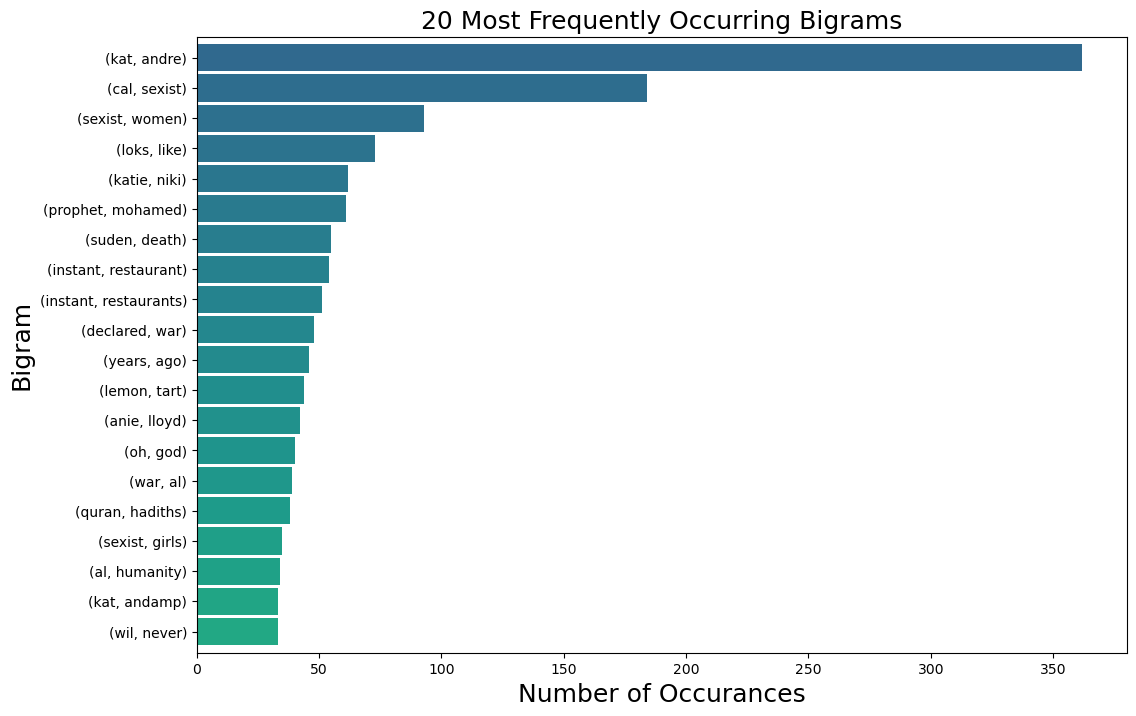

In [73]:
import matplotlib.pyplot as plt
from matplotlib import cm
bigrams_series.sort_values().plot.barh(color=cm.viridis_r(np.linspace(.4,.8, 30)), width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occurring Bigrams', fontsize=18)
plt.ylabel('Bigram', fontsize=18)
plt.xlabel('Number of Occurances', fontsize=18)

### 5.7 Most Frequent Words for Each Classification

In [74]:
# creating new dfs for each classification
df_freq_bullying = tweet_df[tweet_df['oh_label']==1]
df_freq_not_bullying = tweet_df[tweet_df['oh_label']==0]

In [75]:
# pulling out the text data for cleaned tweets
data_bullying = df_freq_bullying['clean_tweets']
data_not_bullying = df_freq_not_bullying['clean_tweets']

In [76]:
# function to tokenize tweets and remove stop words with NLTK built-in library
stop_words = set(stopwords.words('english'))
def process_tweet(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [77]:
# creating lists for processed bullying & not bullying data
process_bullying = list(map(process_tweet, data_bullying))
process_not_bullying = list(map(process_tweet, data_not_bullying))

In [78]:
# exact number in vocab formed from corpus for bullying data 
total_vocab_bullying = set()
for comment in process_bullying:
    total_vocab_bullying.update(comment)
len(total_vocab_bullying)

7744

In [79]:
# exact number in vocab formed from corpus for not bullying data 
total_vocab_NOT_bullying = set()
for comment in process_not_bullying:
    total_vocab_NOT_bullying.update(comment)
len(total_vocab_NOT_bullying)

11878

### 5.8 Most Common Words in Each Category

In [80]:
flat_bullying = [item for sublist in process_bullying for item in sublist]
flat_not_bullying = [item for sublist in process_not_bullying for item in sublist]

In [81]:
bullying_freq = FreqDist(flat_bullying)
not_bullying_freq = FreqDist(flat_not_bullying)

In [82]:
# Top 20 Bullying Speech words:
bullying_freq.most_common(20)

[('sexist', 963),
 ('women', 612),
 ('islam', 525),
 ('al', 380),
 ('like', 359),
 ('muslims', 354),
 ('kat', 334),
 ('girls', 302),
 ('wil', 250),
 ('men', 236),
 ('muslim', 234),
 ('would', 216),
 ('cal', 214),
 ('people', 207),
 ('get', 206),
 ('one', 205),
 ('mohamed', 204),
 ('think', 204),
 ('female', 195),
 ('woman', 181)]

In [83]:
not_bullying_freq.most_common(20)

[('like', 609),
 ('kat', 591),
 ('wil', 585),
 ('al', 570),
 ('would', 496),
 ('people', 465),
 ('get', 427),
 ('one', 385),
 ('andre', 371),
 ('god', 347),
 ('women', 333),
 ('think', 315),
 ('go', 297),
 ('time', 288),
 ('know', 280),
 ('going', 280),
 ('realy', 268),
 ('oh', 244),
 ('se', 233),
 ('make', 231)]

### 5.9 Normalizing Word Frequencies

In [84]:
bullying_total_word_count = sum(bullying_freq.values())
bullying_top_25 = bullying_freq.most_common(25)
print("Bullying Word \t Normalized Frequency")
print()
for word in bullying_top_25:
    normalized_frequency = word[1]/bullying_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Bullying Word 	 Normalized Frequency

sexist 		 0.02339
women 		 0.01486
islam 		 0.01275
al 		 0.009229
like 		 0.008719
muslims 		 0.008598
kat 		 0.008112
girls 		 0.007335
wil 		 0.006072
men 		 0.005732
muslim 		 0.005683
would 		 0.005246
cal 		 0.005198
people 		 0.005028
get 		 0.005003
one 		 0.004979
mohamed 		 0.004955
think 		 0.004955
female 		 0.004736
woman 		 0.004396
god 		 0.00425
know 		 0.00425
want 		 0.003886
religion 		 0.003497
hate 		 0.003425


In [85]:
not_bullying_total_word_count = sum(not_bullying_freq.values())
not_bullying_top_25 = not_bullying_freq.most_common(25)
print("Not Bullying Word \t Normalized Frequency")
print()
for word in not_bullying_top_25:
    normalized_frequency = word[1]/not_bullying_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Not Bullying Word 	 Normalized Frequency

like 		 0.008355
kat 		 0.008108
wil 		 0.008025
al 		 0.00782
would 		 0.006804
people 		 0.006379
get 		 0.005858
one 		 0.005282
andre 		 0.00509
god 		 0.00476
women 		 0.004568
think 		 0.004321
go 		 0.004074
time 		 0.003951
know 		 0.003841
going 		 0.003841
realy 		 0.003677
oh 		 0.003347
se 		 0.003196
make 		 0.003169
ben 		 0.003142
want 		 0.003032
isis 		 0.002908
islam 		 0.002757
even 		 0.002716


### 5.10 Visualizing Top Word Percentages

In [86]:
# create counts of bullying and not bullying with values and words
bullying_bar_counts = [x[1] for x in bullying_freq.most_common(20)]
bullying_bar_words = [x[0] for x in bullying_freq.most_common(20)]

not_bullying_bar_counts = [x[1] for x in not_bullying_freq.most_common(20)]
not_bullying_bar_words = [x[0] for x in not_bullying_freq.most_common(20)]

In [87]:
# set the color of the bar graphs
color = cm.magma(np.linspace(.4,.8, 30))

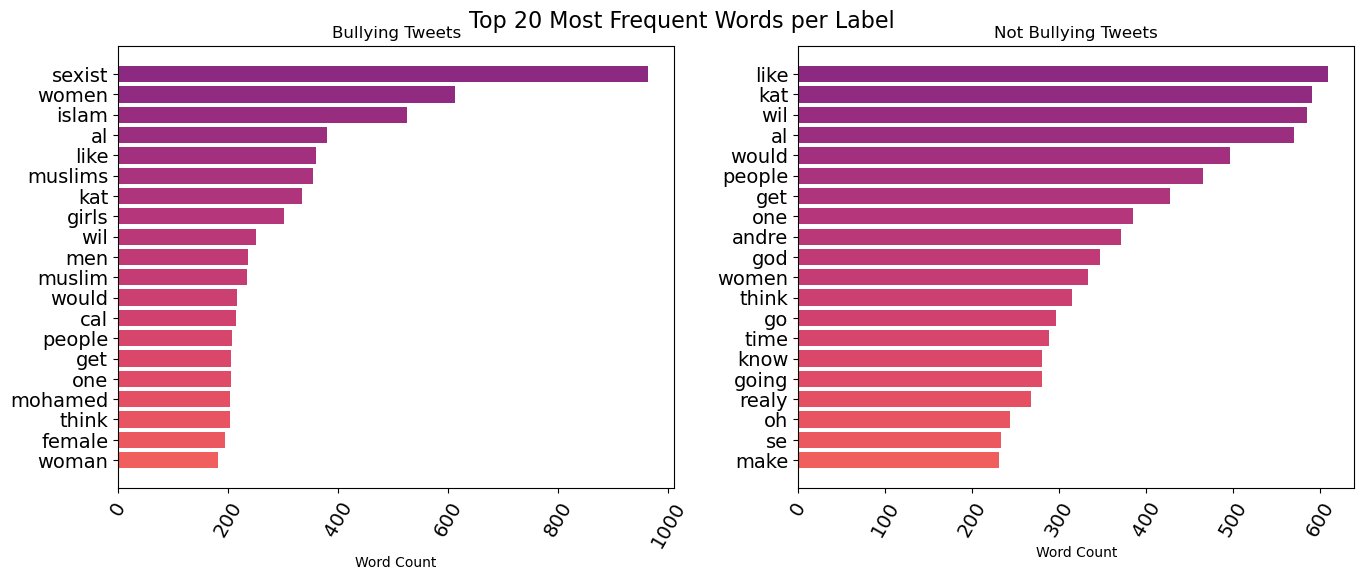

In [88]:
new_figure = plt.figure(figsize=(14,6))

ax = new_figure.add_subplot(121)
ax.invert_yaxis()

ax2 = new_figure.add_subplot(122)
ax2.invert_yaxis()

# generating a bar chart on each axes
ax.barh(bullying_bar_words, bullying_bar_counts, color=color)
ax2.barh(not_bullying_bar_words, not_bullying_bar_counts, color=color)

ax.title.set_text('Bullying Tweets')
ax2.title.set_text('Not Bullying Tweets')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=14)
    plt.xlabel("Word Count")
    plt.yticks(fontsize=14)
plt.tight_layout(pad=2)

new_figure.suptitle('Top 20 Most Frequent Words per Label', fontsize=16)
plt.show()

### 5.11 What Words are Only in Bullying Tweets?

In [89]:
def returnNotMatches(a, b):
    return [x for x in a if x not in b]

In [90]:
returnNotMatches(flat_bullying, flat_not_bullying)

['roney',
 'striker',
 'geordie',
 'shore',
 'buting',
 'idiosyncrasies',
 'degres',
 'funily',
 'curb',
 'iner',
 'bogun',
 'wrestle',
 'geography',
 'butno',
 'comediene',
 'hilariously',
 'rly',
 'unfuny',
 'guesit',
 'rig',
 'avs',
 'seth',
 'yesand',
 'fascists',
 'fanatics',
 'pretends',
 'jenifer',
 'lopez',
 'iliad',
 'protagonist',
 'stupidist',
 'rationalizing',
 'patriots',
 'bimbo',
 'weaning',
 'turing',
 'foking',
 'revised',
 'thots',
 'divorce',
 'femshep',
 'apease',
 'anouncer',
 'iowa',
 'barf',
 'erections',
 'rapers',
 'wnba',
 'parenthod',
 'thatyou',
 'katjia',
 'uterus',
 'subjected',
 'abnormal',
 'marying',
 'minds',
 'enriched',
 'wisdom',
 'situations',
 'walkyou',
 'girlone',
 'rap',
 'supermodel',
 'insecure',
 'hockey',
 'excitin',
 'apathy',
 'earning',
 'mistakenly',
 'conflated',
 'skaters',
 'graceful',
 'cuntyou',
 'machin',
 'diseases',
 'perished',
 'thatfeminism',
 'argmnt',
 'oversalted',
 'cucumber',
 'unprotected',
 'iliterate',
 'ere',
 'jobot

### 5.13 Visualizing Unique Words with Venn Diagram

In [91]:
!pip install matplotlib_venn
import matplotlib_venn as venn
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Comparison of Unique Words in Each Corpus Label')

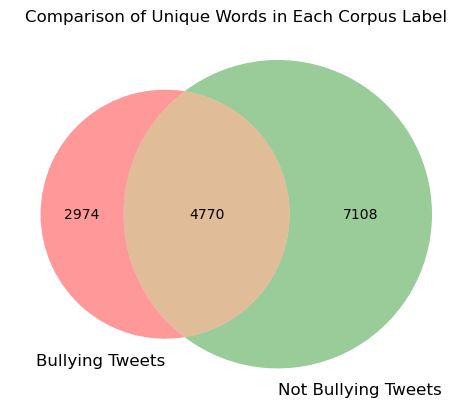

In [92]:
venn2([set(flat_bullying), set(flat_not_bullying)], set_labels = ('Bullying Tweets', 'Not Bullying Tweets'))
plt.title('Comparison of Unique Words in Each Corpus Label')

### 6.  Word Clouds

In [93]:
from wordcloud import WordCloud
bullying_dict = dict(zip(bullying_bar_words, bullying_bar_counts))
not_bullying_dict = dict(zip(not_bullying_bar_words, not_bullying_bar_counts))

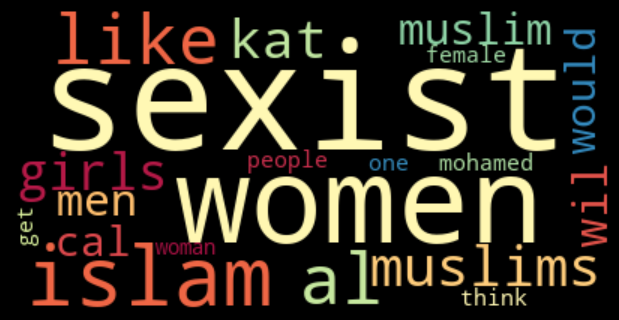

In [94]:
# create the word cloud:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(bullying_dict)

# Display the generated image w/ matplotlib:
plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

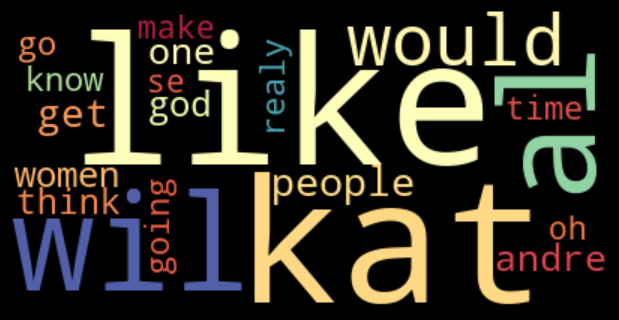

In [95]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(not_bullying_dict)

plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

These word clouds are pretty much unusable on public-facing documents, but they tell us that the top words for each label are very similar. It may be hard for the models to differentiate beteween what can be classified as bullying or not

### Tweet Cloud of Most Frequent Words in Corpus

In [96]:
tweet_df = clean_df[['clean_tweets', 'oh_label']].copy()

In [97]:
tweet_df.to_csv('corpus.txt', sep='|')

In [98]:
!pip install stylecloud
import stylecloud
stylecloud.gen_stylecloud(file_path='corpus.txt', icon_name='fab fa-twitter')

# 7 Sentiment Analysis with VADER

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 

The compound polarity score is a metric that calculates the sum of all the [lexicon ratings](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt) which have been normalized between -1 and +1. With -1 being extreme negative and +1 being extreme positive. **This score encompasses the overall sentiment of this corpus.**


In [182]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     -------------------------------------- 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [183]:
analyser = SentimentIntensityAnalyzer()

## 7.1 Sentiment of Tweets

In [184]:
# function to calculate polarity scores
pol = lambda x: analyser.polarity_scores(x)

In [185]:
# creating new column 'polarity' in clean_df
tweet_df['polarity'] = tweet_df['clean_tweets'].apply(pol)

In [186]:
tweet_df.head()

,clean_tweets,oh_label,polarity
0,i read them in contextno change in meaning the...,0,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."
1,now you idiots claim that people who tried to ...,0,"{'neg': 0.245, 'neu': 0.755, 'pos': 0.0, 'comp..."
2,cal me sexist but when i go to an auto place i...,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,wrong isis folows the example of mohamed and t...,1,"{'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'comp..."
4,no no no no no no,0,"{'neg': 0.0, 'neu': 0.096, 'pos': 0.904, 'comp..."


### 7.2 Parsing out Polarity Scores

In [187]:
# dropping unessential columns
# and seperating out 'polarity' dictionary
df = pd.concat([tweet_df.drop(['polarity'], axis=1), tweet_df['polarity'].apply(pd.Series)], axis=1)

In [188]:
df.head()

,clean_tweets,oh_label,neg,neu,pos,compound
0,i read them in contextno change in meaning the...,0,0.286,0.714,0.000,-0.7003
1,now you idiots claim that people who tried to ...,0,0.245,0.755,0.000,-0.7579
2,cal me sexist but when i go to an auto place i...,1,0.000,1.000,0.000,0.0000
3,wrong isis folows the example of mohamed and t...,1,0.237,0.763,0.000,-0.4767
4,no no no no no no,0,0.000,0.096,0.904,0.7536


### 7.3 Average Polarity Scores for Each Label

In [191]:
# new dataframe with average polarity score for each label
scores_df = df.groupby('oh_label')['pos'].mean().reset_index(name='avg_positive')
scores_df['avg_neutral'] = df.groupby('oh_label')['neu'].mean()
scores_df['avg_negative'] = df.groupby('oh_label')['neg'].mean()
scores_df['avg_compound'] = df.groupby('oh_label')['compound'].mean()


In [192]:
scores_df.head()

,oh_label,avg_positive,avg_neutral,avg_negative,avg_compound
0,0,0.091953,0.790417,0.092919,-0.017209
1,1,0.075042,0.788304,0.132093,-0.133920


### 7.4 Interpreting Polarity Scores

The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories.

- Bullying tweets on average are 7% positive, 78% neutral, and 13% negative.
- Non Bullying tweets on average are 9% positive, 79% neutral, and 9% negative.

Although these are slightly similar scores, we can see that tweets with Bullying have more negativity overall. It makes sense that Non bullying tweets would also be negative, because that category contains offensive language regardless of classifciation. 

It's interesting that a majority of tweets in both classes were deemed neutral. 

The Compound score is a metric that calculates the sum of all the [lexicon ratings](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt) which have been normalized between -1 and +1. With -1 being extreme negative and +1 being extreme positive.

- Bullying tweets on average have a compound score of -0.1339
- Non Bullying tweets on average have a compound score of -0.0172

According to this metric, both classes of tweets have negative sentiments because their normalized compound scores are less than -0.05.

This score seems to be the more reliable metric because it encompasses the overall sentiment of this corpus. Both classes contain negative, offensive language. But tweets that have been classified as Bullying are especially negative.

In [198]:
# function to add percentage above each polarity score
def autolabel(rects):
    """Add a text label above bars to display its perentage of data."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3}'.format(height * 100) + '%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

### 7.5 Visualizing Distribution of Each Score


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


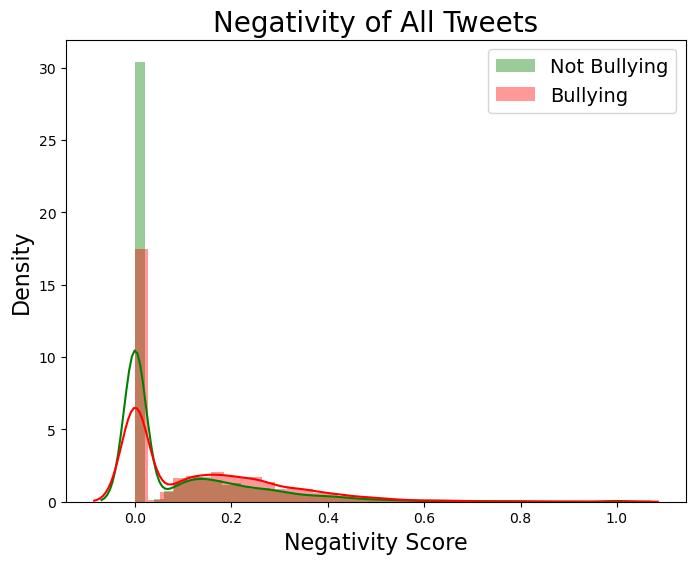

In [204]:
# creating dnsity plot for each label's polarity scores
plt.figure(figsize=(8, 6))
ax = sns.distplot(df['neg'][clean_df['oh_label'] == 0], label='Not Bullying', color='green')
ax = sns.distplot(df['neg'][clean_df['oh_label'] == 1], label='Bullying', color='red')
# setting label, title and legend
ax.set_title('Negativity of All Tweets', fontsize=20)
ax.set_ylabel('Density', fontsize=16)
ax.set_xlabel('Negativity Score', fontsize=16)
ax.legend(prop=dict(size=14))
plt.savefig('negativity_scores.png', bbox_inches = "tight", pad_inches=.5)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


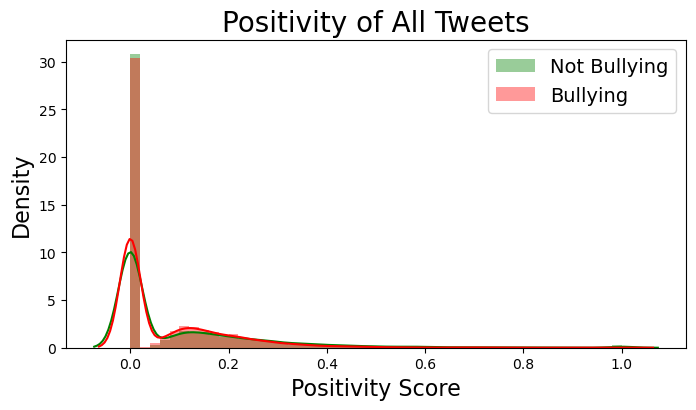

In [205]:
# creating dnsity plot for each label's polarity scores
plt.figure(figsize=(8, 4))
ax = sns.distplot(df['pos'][clean_df['oh_label'] == 0], label='Not Bullying', color='green')
ax = sns.distplot(df['pos'][clean_df['oh_label'] == 1], label='Bullying', color='red')
# setting label, title and legend
ax.set_title('Positivity of All Tweets', fontsize=20)
ax.set_ylabel('Density', fontsize=16)
ax.set_xlabel('Positivity Score', fontsize=16)
ax.legend(prop=dict(size=14))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


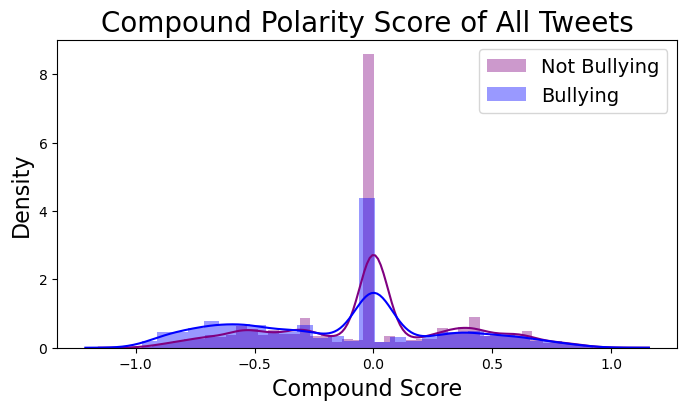

In [206]:
# creating dnsity plot for each label's polarity scores
plt.figure(figsize=(8, 4))
ax = sns.distplot(df['compound'][clean_df['oh_label'] == 0], label='Not Bullying', color='purple')
ax = sns.distplot(df['compound'][clean_df['oh_label'] == 1], label='Bullying', color='blue')
# setting label, title and legend
ax.set_title('Compound Polarity Score of All Tweets', fontsize=20)
ax.set_ylabel('Density', fontsize=16)
ax.set_xlabel('Compound Score', fontsize=16)
ax.legend(prop=dict(size=14))

### 7.6  Bar Chart of Sentiment Scores by Tweet Type

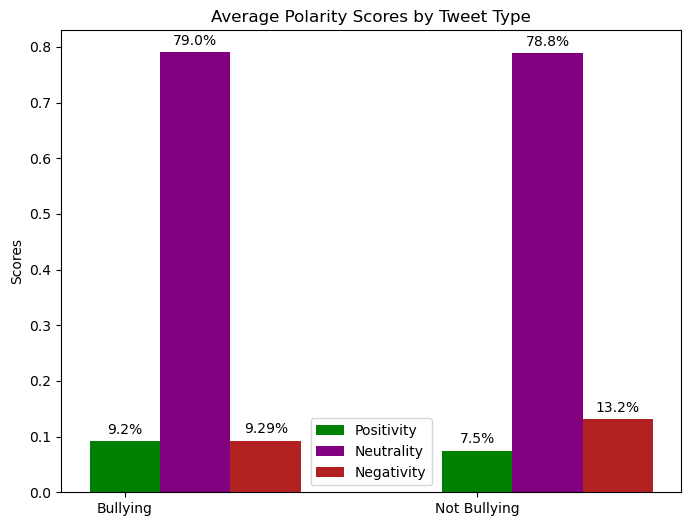

In [195]:
# setting labls and average scores
labels = ['Bullying', 'Not Bullying']
all_positivity = df['pos'].groupby(df['oh_label']).mean()
all_neutrality = df['neu'].groupby(df['oh_label']).mean()
all_negativity = df['neg'].groupby(df['oh_label']).mean()

# set width of bars
width = 0.2  # the width of the bars
# set position of bar on x-axis
x = np.arange(len(labels))
r1 = x
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

# graph figure
fig, ax = plt.subplots(figsize=(8, 6))
# 3 types of grouped bar graphs
ax1 = ax.bar(r1, all_positivity, width, label='Positivity', color='green')
ax2 = ax.bar(r2, all_neutrality, width, label='Neutrality', color='purple')
ax3 = ax.bar(r3, all_negativity, width, label='Negativity', color='firebrick')

# applying percentage display function
autolabel(ax1)
autolabel(ax2)
autolabel(ax3)

# setting axis labels, title and legend location
ax.set_ylabel('Scores')
ax.set_title('Average Polarity Scores by Tweet Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('avg_polarity_by_tweet_type.png', bbox_inches = "tight", pad_inches=.5)

# 8 Feature Engineering

With Natural Language Processing, the purpose of feature engineering is to transform the tokenized text data into numerical vectors that the machine learning algorithm can "understand."

In this project, we'll be iterating through three different feature engineering techniques: **Count Vectorization, TF-IDF Vectorization and Doc2Vec**. Trying out these techniques could yield vastly different metrics on the same four baseline models.

# 8.1 Splitting the data into Train - Test 
First, let's perform a train-test split of the dataset, where 20% is reserved as unseen testing data.

## TF-IDF Vectorization

First, we’ll be trying one of the most popular methods, TF-IDF Vectorization.

This is an acronym that stands for “Term Frequency — Inverse Document” Frequency which are the components of the resulting scores assigned to each word.
- Term Frequency: This summarizes how often a given word appears within a document.
- Inverse Document Frequency: This down scales words that appear a lot across documents.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=15)

In [101]:
# instantiating tf_idf vectorizer
tfidf = TfidfVectorizer(stop_words= stop_words, ngram_range=(1,2))

In [102]:
# transforming tokenized data into sparse matrix format with 20K stored elements
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [103]:
# taking a quick look at the non zero elements
non_zero_cols = X_train_tfidf.nnz / float(X_train_tfidf.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))
percent_sparse = 1 - (non_zero_cols / float(X_train_tfidf.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 12.70966505710125
Percentage of columns containing ZERO: 0.9998300506109902


Here, we can see that 99.9% of the columns contain a zero, meaning that's a very **sparse matrix** with 15K columns. We know the amount of columns because it's the size of the total corpus vocabulary. Additionally, it seems that the average length of the individual tweets is 12 words.

# 8.2 Modeling Process

## Evaluation Metrics

For this business problem, **we will use F1 score as the main metric**, while also looking at Precision and Recall. The F1 score finds the harmonic mean between Precision and Recall, and it's useful for data with high class imbalance.

**Overall, we want as much bullying tweets to flagged as possible** and so that it can be efficiently removed. This means also **optomizing the True Positive Rate**, aka Recall.

### Weighted F1 Score

We will also be looking at the weighted F1 score, as it **can account for the class imbalance in labels by calculating metrics for each label**. It finds their average weighted by support (the number of true instances for each label). This results in a F1 score that is not between precision and recall.

### Cross Validation

Additionally, in order to see **whether a model is overfit or underfit**, we can use K-Fold Cross Validation to generate a F1 score for the training set. 

This method uses a limited sample in order to estimate how the model is expected to perform when making predictions on unseen data. For each model, 'K" aka the number of folds will be 5. This means that the data sample will be split into 5 groups and each used as the test set.

# Baseline Modeling

In this section we'll be running baseline Randon Forest, Logistic Regression, Naive Bayes and Support Vector Machine (SVM) models. Out of those 4 models, the best performing one will be selected to iterate through to achieve an MVP.

## 8.3 Baseline Random Forest

A random forest model is an ensamble method that uses multiple Decision Trees to try to predict the output variable. Typically, it's one of the best performing models for classification problems.

In [104]:
rf_baseline = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0)

In [105]:
%%time
rf_baseline.fit(X_train_tfidf, y_train)
rf_test_preds = rf_baseline.predict(X_test_tfidf)

Wall time: 1min 42s


In [106]:
# custom fuctions
# pip install helper_functions
import helper_functions as helpers
rf_precision = precision_score(y_test, rf_test_preds)
rf_recall = recall_score(y_test, rf_test_preds)
rf_f1_score = f1_score(y_test, rf_test_preds)
rf_f1_weighted = f1_score(y_test, rf_test_preds, average='weighted')

# printing scores
helpers.evaluation(rf_precision, rf_recall, rf_f1_score, rf_f1_weighted)

Testing Set Evaluation Metrics:
Precision: 0.7717
Recall: 0.5547
F1 Score: 0.6454
Weighted F1 Score: 0.7954


In [108]:
%%time
# training f1
from sklearn.model_selection import cross_val_score, GridSearchCV
rf_f1_cv = cross_val_score(rf_baseline, X_train_tfidf, y_train, scoring='f1', cv=5)
rf_mean_cv = round(rf_f1_cv.mean(), 6)

Wall time: 20min 48s


In [109]:
# Checking if the model is overfit or underfit?
rf_fit = helpers.model_fit(rf_mean_cv, rf_f1_score)
rf_fit


'overfit'

## 8.4 Understanding Overfit vs. Underfit

Above, I used a custom function to streamline the categorization process. For instance, when a model's training metrics are higher than its testing metrics, then it is overfit.

Generally, a slightly underfit model is preferred. This means that the model is not too specific to the training data, and it should be able to generalize well on unseen data.

We can continue to run this custom fuction on future iterations to determine each model's fit. We can also store all the testing set evaluation metrics for each model into a dictionary, and display them in a dataframe later for comparison.

In [110]:
# creating dictionary to store all metrics
metric_dict = {}
# adding scores to metric_dict
metric_dict['Baseline Random Forest - TFIDF'] = {'precision': rf_precision, 'recall': rf_recall, 'f1_score': rf_f1_score, 'weighted_f1': rf_f1_weighted, 'fit': rf_fit}

## 8.5 Baseline Logistic Regression
Logistic Regression is another common model used for classification tasks. Additionally, this model tends to work better with larger datasets.

In [111]:
log_reg_baseline = LogisticRegression(penalty='l2', class_weight='balanced', random_state=20)
# class_weight='balanced' actually didn't impact the score

Here I added class_weight='balanced' again, but this actually didn't impact the score. So we'll keep that hyperparamter. Also note that the penality is set to L2, but that's already the default.

In [112]:
%%time
log_reg_baseline.fit(X_train_tfidf, y_train)
log_reg_test_preds = log_reg_baseline.predict(X_test_tfidf)

Wall time: 1.48 s


In [113]:
log_reg_precision = precision_score(y_test, log_reg_test_preds)
log_reg_recall = recall_score(y_test, log_reg_test_preds)
log_reg_f1_score = f1_score(y_test, log_reg_test_preds)
log_reg_f1_weighted = f1_score(y_test, log_reg_test_preds, average='weighted')

# printing scores
helpers.evaluation(log_reg_precision, log_reg_recall, log_reg_f1_score, log_reg_f1_weighted)

Testing Set Evaluation Metrics:
Precision: 0.6794
Recall: 0.7179
F1 Score: 0.6981
Weighted F1 Score: 0.8031


Compared the the first Random Forest baseline, the Logistic Regression baseline performed much better. The F1 score increased from 0.679 to 0.713.

Although, this F1 score could still be increased. Before deciding on the model to iterate on, let's try Naive Bayes and SVM baselines first.

In [114]:
%%time
# training f1
log_reg_f1_cv = cross_val_score(log_reg_baseline, X_train_tfidf, y_train, scoring='f1', cv=5)
log_reg_mean_cv = round(log_reg_f1_cv.mean(), 6)

Wall time: 7 s


In [115]:
# Let us check if is this model overfit or underfit?
log_reg_fit = helpers.model_fit(log_reg_mean_cv, log_reg_f1_score)
log_reg_fit

'underfit'

In [116]:
# adding scores to metric_dict
metric_dict['Baseline Log Reg - TFIDF'] = {'precision': log_reg_precision, 'recall': log_reg_recall, 'f1_score': log_reg_f1_score, 'weighted_f1': log_reg_f1_weighted, 'fit': log_reg_fit}

## 8.6 Baseline Naive Bayes
This model is another common baseline classification algorithm that uses Bayes Theorem with an assumption of independence between predictors. However, this assumption of independence is usually violated because the predictors are typically correlated to each other. That's where the "Naive" comes from.

Naive Bayes is a popular choice for text classification because it classifies based on the probabilities of events. Another pro is that this model takes less time to train.

In [117]:
from sklearn.naive_bayes import MultinomialNB
baseline_bayes = MultinomialNB(alpha = .01)

In [118]:
%%time
baseline_bayes.fit(X_train_tfidf, y_train)
bayes_test_preds = baseline_bayes.predict(X_test_tfidf)

Wall time: 19.6 ms


In [119]:
bayes_precision = precision_score(y_test, bayes_test_preds)
bayes_recall = recall_score(y_test, bayes_test_preds)
bayes_f1_score = f1_score(y_test, bayes_test_preds)
bayes_f1_weighted = f1_score(y_test, bayes_test_preds, average='weighted')

# printing scores
helpers.evaluation(bayes_precision, bayes_recall, bayes_f1_score, bayes_f1_weighted)

Testing Set Evaluation Metrics:
Precision: 0.6689
Recall: 0.5873
F1 Score: 0.6254
Weighted F1 Score: 0.7711


The F1 score dropped down to 0.6254. So, this model performed worse than both the Random Forest and Logistic Regression models. This is surprising because Naive Bayes typically performs pretty well with text data. This could indicate that preprocessing steps could be improved.

For now, let's try the last baseline and decide which model to iterate on.

In [120]:
%%time
# training f1
bayes_f1_cv = cross_val_score(baseline_bayes, X_train_tfidf, y_train, scoring='f1', cv=5)
bayes_mean_cv = round(bayes_f1_cv.mean(), 6)

Wall time: 141 ms


In [121]:
# Checking if the model is overfit or underfit?
bayes_fit = helpers.model_fit(bayes_mean_cv, bayes_f1_score)
bayes_fit

'overfit'

In [122]:
# adding scores to metric_dict
metric_dict['Baseline Naive Bayes - TFIDF'] = {'precision': bayes_precision, 'recall': bayes_recall, 'f1_score': bayes_f1_score, 'weighted_f1': bayes_f1_weighted, 'fit': bayes_fit}

## 8.7 Baseline Support Vector Machine (SVM)

An SVM is a type of classifier that modifies the loss function for optimization to not only take into account overall accuracy metrics of the resulting predictions, but also to maximize the decision boundary between the data points. Essentially, this further helps tune the classifier as a good balance between underfitting and overfitting.

A notable hyperparameter is the Kernel, which reprojects data onto a new parameter space using combinations of existing features. From there, the same process of applying SVMs to this transformed space can then be employed. This could provide more complex boundaries than just Linear.

For now, I am trying SVM with a Linear kernel as a baseline.

In [123]:
SVM_baseline = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight='balanced')

I have also added class_weight='balanced' to SVM models. This helps to deal with the huge class imbalance in this dataset.

In [124]:
%%time 
# fit the training dataset on the classifier
SVM_baseline.fit(X_train_tfidf, y_train)
# predict the labels on validation dataset
SVM_test_preds = SVM_baseline.predict(X_test_tfidf)

Wall time: 1min 20s


In [125]:
SVM_precision = precision_score(y_test, SVM_test_preds)
SVM_recall = recall_score(y_test, SVM_test_preds)
SVM_f1_score = f1_score(y_test, SVM_test_preds)
SVM_f1_weighted = f1_score(y_test, SVM_test_preds, average='weighted')

# printing scores
helpers.evaluation(SVM_precision, SVM_recall, SVM_f1_score, SVM_f1_weighted)

Testing Set Evaluation Metrics:
Precision: 0.6737
Recall: 0.739
F1 Score: 0.7048
Weighted F1 Score: 0.8045


This model produced the highest F1 so far, with a score of 0.7196. Next, let's look at the performance of all baselines all together, and move forward with a single model to iterate on.

In [126]:
%%time
# training f1
base_SVM_f1_cv = cross_val_score(SVM_baseline, X_train_tfidf, y_train, scoring='f1', cv=5)
base_SVM_mean_cv = round(base_SVM_f1_cv.mean(), 6)

Wall time: 3min 45s


In [127]:
# Checking if the model is overfit or underfit?
base_SVM_fit = helpers.model_fit(base_SVM_mean_cv, SVM_f1_score)
base_SVM_fit

'underfit'

In [128]:
# adding scores to metric_dict
metric_dict['Baseline SVM - TFIDF'] = {'precision': SVM_precision, 'recall': SVM_recall, 'f1_score': SVM_f1_score, 'weighted_f1': SVM_f1_weighted, 'fit': base_SVM_fit}

## 8.8  Evaluation Metrics for All Baseline Models

In [129]:
# printing dict for testing set metrics
pd.DataFrame.from_dict(metric_dict, orient='index')

,precision,recall,f1_score,weighted_f1,fit
Baseline Random Forest - TFIDF,0.771696,0.554702,0.645449,0.795436,overfit
Baseline Log Reg - TFIDF,0.679382,0.717850,0.698087,0.803050,underfit
Baseline Naive Bayes - TFIDF,0.668852,0.587332,0.625447,0.771124,overfit
Baseline SVM - TFIDF,0.673666,0.738964,0.704805,0.804537,underfit


It's a pretty close call between the Logistic Regression and SVM baselines. But overall, the **Linear SVM model** performed the best across both uniform and weighted F1. However, there is still work to be done to bring that score up higher.

Next, we'll try improving that model with other feature engineering techniques, class imbalance remedy methods and tuning hyperparameters with grid search.

## 9 Alternative Feature Engineering Methods
In this section, we can experiment with Count Vectorization and Doc2Vec as they are different ways to represent the data in a format that the machine learning models can "understand."

# 9.1 Doc2Vec

I am trying Doc2Vec feature engineering, which is an extension of Word2Vec. It aims to learn how to project a document into a latent d-dimensional space. Specifically, the Distributed Bag of Words (DBOW) model ignores the context words in the input, but instead forces the model to predict words randomly sampled from the paragraph in the output.

In [130]:
# fresh TTS for doc2vec data
doc_train, doc_test = train_test_split(tweet_df, test_size=0.3, random_state=42)

##  9.2 Data Preparation
After performing a fresh train test split of the original dataframe, the next step is tokenizing the text as usual. Again, we can do this with NLTK.

The lambda functions below will tokenize both the training and test set and tag each tweet with its label, "Bullying" or "Not Bullying."

In [131]:
# tagging training set
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_train = doc_train.apply(
    lambda r: TaggedDocument(words=helpers.tokenize_text(r['clean_tweets']), tags=[r.oh_label]), axis=1)
# tagging testing set
tagged_test = doc_test.apply(
    lambda r: TaggedDocument(words=helpers.tokenize_text(r['clean_tweets']), tags=[r.oh_label]), axis=1)

In [132]:
tagged_train.values[30]

TaggedDocument(words=['things', 'are', 'hapening', 'big', 'things', 'could', 'not', 'be', 'more', 'excited'], tags=[0])

### 9.3 Training DBOW Model

As mentioned before, the Distributed Bag of Words (DBOW) model ignores the context words in the input, but instead forces the model to predict words randomly sampled from the paragraph in the output. It's similar to the Skip-gram model in Word2Vec.

The hyperparameters I am using are as follows:
- `vector_size`: dimensionality of the feature vectors
- `alpha`: initial learning rate
- `min_count`: ignores all words with total frequency lower than this
- `dm`: defines the training algorithm; when dm=1, 'distributed memeory' (PV-DVM) is used
- `epochs`: number of iterations (epochs) over the corpus, defaults to 10 for Doc2Vec

In [133]:
# instantiating a doc2vec DBOW model
dbow_model = Doc2Vec(vector_size=100, 
                alpha=0.025, 
                min_count=5,
                dm=1,epochs =100)

In [134]:
from tqdm import tqdm
from sklearn import utils
tqdm.pandas(desc="progress-bar")

# building vocabulary 
dbow_model.build_vocab([x for x in tqdm(tagged_train.values)])

100%|██████████| 11416/11416 [00:00<00:00, 1393462.97it/s]


In [135]:

%%time
for epoch in range(30):
    dbow_model.train(utils.shuffle([x for x in tqdm(tagged_train.values)]), total_examples=len(tagged_train.values), epochs=1)
    dbow_model.alpha -= 0.002
    dbow_model.min_alpha = dbow_model.alpha

100%|██████████| 11416/11416 [00:00<00:00, 2467771.71it/s]


Wall time: 50.1 s


## 9.4  Applying Doc2Vec Data to Train Baseline Linear SVM

The custom function `vec_for_learning` simply transforms the tagged tweets into vectors that are suitable for classification model use.

In [136]:
def vec_for_learning(model, tagged_docs):
    """Final vector feature for classifier use"""
    targets = []
    regressors = []
    for doc in tagged_docs:
        vector = model.infer_vector(doc.words)
        targets.append(doc.tags[0])
        regressors.append(vector)
    return targets, regressors


In [137]:
# train-test split
doc_y_train, doc_X_train = vec_for_learning(dbow_model, tagged_train)
doc_y_test, doc_X_test = vec_for_learning(dbow_model, tagged_test)

Next, we feed the Doc2Vec data into the previous Linear SVM model to see how this method compares to TF-IDF Vectorization.

In [138]:
# instantiating new SVM model
Doc2Vec_SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight='balanced')

In [139]:
%%time
# fit the training dataset on the classifier
Doc2Vec_SVM.fit(doc_X_train, doc_y_train)

Wall time: 19.9 s


SVC(class_weight='balanced', gamma='auto', kernel='linear')

In [140]:
doc_SVM_y_preds = Doc2Vec_SVM.predict(doc_X_test)

In [141]:
doc_SVM_precision = precision_score(doc_y_test, doc_SVM_y_preds)
doc_SVM_recall = recall_score(doc_y_test, doc_SVM_y_preds)
doc_SVM_f1_score = f1_score(doc_y_test, doc_SVM_y_preds)
doc_SVM_f1_weighted = f1_score(doc_y_test, doc_SVM_y_preds, average='weighted')

# printing scores
helpers.evaluation(doc_SVM_precision, doc_SVM_recall, doc_SVM_f1_score, doc_SVM_f1_weighted)

Testing Set Evaluation Metrics:
Precision: 0.6476
Recall: 0.6246
F1 Score: 0.6359
Weighted F1 Score: 0.7637


Unfortunately, using this method did not produce a great F1 score. 

In [142]:
%%time
# training f1
doc_SVM_f1_cv = cross_val_score(Doc2Vec_SVM, doc_X_train, doc_y_train, scoring='f1', cv=5)
doc_SVM_mean_cv = round(doc_SVM_f1_cv.mean(), 6)

Wall time: 1min 8s


In [143]:
# Checking if the model is overfit or underfit?
doc_SVM_fit = helpers.model_fit(doc_SVM_mean_cv, doc_SVM_f1_score)
doc_SVM_fit

'overfit'

Additionally, the Doc2Vec method produced an overfit model. Whereas the TF-IDF vectorization method on the same exact Linear SVM model produced an underfit model.

In [144]:
metric_dict['Baseline SVM - Doc2Vec'] = {'precision': doc_SVM_precision, 'recall': doc_SVM_recall, 'f1_score': doc_SVM_f1_score, 'weighted_f1': doc_SVM_f1_weighted, 'fit': doc_SVM_fit}

## 9.5  Comparing with Other Models

In [145]:
# printing dict for testing set metrics
pd.DataFrame.from_dict(metric_dict, orient='index')

,precision,recall,f1_score,weighted_f1,fit
Baseline Random Forest - TFIDF,0.771696,0.554702,0.645449,0.795436,overfit
Baseline Log Reg - TFIDF,0.679382,0.717850,0.698087,0.803050,underfit
Baseline Naive Bayes - TFIDF,0.668852,0.587332,0.625447,0.771124,overfit
Baseline SVM - TFIDF,0.673666,0.738964,0.704805,0.804537,underfit
Baseline SVM - Doc2Vec,0.647552,0.624612,0.635875,0.763657,overfit


Its evident that now, the Doc2Vec model didn't perform as well as the Baseline Logisitc Regression or Linear SVM with TF-IDF Vectorization. 

We are looking for a balance of a high recall and F1 scores. Therefore, the F1 score could still be improved.

Let's look at this closer with a classification report, to see how both SVM models predicted each label using the different vectorization methods.

###  9.6 SVM Baselines: TF-IDF vs. Doc2Vec

In [146]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report
target_names = ['class 0', 'class 1']
# Tf-IDF baseline
print('-'*14 + ' SVM Baseline with TF-IDF ' + '-'*13)
print(classification_report(y_test, SVM_test_preds, target_names=target_names))
# Doc2Vec baseline
print('-'*13 + ' SVM Baseline with Doc2Vec ' + '-'*13)
print(classification_report(doc_y_test, doc_SVM_y_preds, target_names=target_names))

-------------- SVM Baseline with TF-IDF -------------
              precision    recall  f1-score   support

     class 0       0.87      0.83      0.85      2220
     class 1       0.67      0.74      0.70      1042

    accuracy                           0.80      3262
   macro avg       0.77      0.79      0.78      3262
weighted avg       0.81      0.80      0.80      3262

------------- SVM Baseline with Doc2Vec -------------
              precision    recall  f1-score   support

     class 0       0.82      0.83      0.83      3284
     class 1       0.65      0.62      0.64      1609

    accuracy                           0.76      4893
   macro avg       0.73      0.73      0.73      4893
weighted avg       0.76      0.76      0.76      4893



As mentioned, the Doc2Vec was able to predict more of the positive class "Bullying" when it comes to Recall, but the F1 scores for each label are much lower than the TF-IDF vectorization method. Therefore, we won't proceed with this method. Instead, let's try the last feature engineering method, Count Vectorization.

## 10 Count Vectorization

Count Vectorization is similar to TF-IDF Vectorization, but it simply counts the number of times each word appears in a document. Therefore, each individual tweet becomes a single vector where each element in the vector corresponds to the count of a unique word.

It's worth noting that when we vectorize text in this way, we lose the order that the sentences were in. This is known as the **Bag of Words** appraoch, because all of the tokenized words in the corpus are thrown into a "bag" of vectors for the model to "understand."

In [147]:
# fresh TTS
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=20)

In [148]:
# instantiating count vectorizer
count = CountVectorizer(stop_words=stop_words)

In [149]:
# fitting to the train and test set
X_train_count = count.fit_transform(X_train)
X_test_count = count.transform(X_test)

## 10.1 Baseline Linear SVM with Count Vectorization

With TF-IDF Vectorization, the Linear SVM achieved an F1 of 0.7195. Let's see the Count Vectorization method for feature engineering can improve that score.

In [150]:
count_SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight='balanced')

In [151]:
%%time 
# fit the training dataset on the classifier
count_SVM.fit(X_train_count, y_train)
# predict the labels on validation dataset
count_SVM_test_preds = count_SVM.predict(X_test_count)

Wall time: 46.3 s


In [152]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report
count_SVM_precision = precision_score(y_test, count_SVM_test_preds)
count_SVM_recall = recall_score(y_test, count_SVM_test_preds)
count_SVM_f1_score = f1_score(y_test, count_SVM_test_preds)
count_SVM_f1_weighted = f1_score(y_test, count_SVM_test_preds, average='weighted')

# printing scores
target_names = ['class 0', 'class 1']
print(classification_report(y_test, count_SVM_test_preds, target_names=target_names))
helpers.evaluation(count_SVM_precision, count_SVM_recall, count_SVM_f1_score, count_SVM_f1_weighted)

              precision    recall  f1-score   support

     class 0       0.84      0.85      0.84      2180
     class 1       0.69      0.67      0.68      1082

    accuracy                           0.79      3262
   macro avg       0.76      0.76      0.76      3262
weighted avg       0.79      0.79      0.79      3262

Testing Set Evaluation Metrics:
Precision: 0.6882
Recall: 0.671
F1 Score: 0.6795
Weighted F1 Score: 0.7893


Unfortunately this model did not achieve a higher F1 than the TF-IDF version of the SVM model.  But as mentioned before, a balance between high recall and high F1 is important for this business context.


In [153]:
%%time
# training f1
count_SVM_f1_cv = cross_val_score(count_SVM, doc_X_train, doc_y_train, scoring='f1', cv=5)
count_SVM_mean_cv = round(count_SVM_f1_cv.mean(), 6)

Wall time: 1min 9s


In [154]:
# Checking if this model is overfit or underfit?
count_SVM_fit = helpers.model_fit(doc_SVM_mean_cv, doc_SVM_f1_score)
count_SVM_fit

'overfit'

In [155]:
metric_dict['Baseline SVM - CountVectorizer'] = {'precision': count_SVM_precision, 'recall': count_SVM_recall, 'f1_score': count_SVM_f1_score, 'weighted_f1': count_SVM_f1_weighted, 'fit': count_SVM_fit}

## 10.2 Baseline Logistic Regression with Count Vectorization

The initial Logistic Regression model using TF-IDF Vectorization achieved a decent F1 score of 0.3878. Additionally, that baseline actually had a higher F1 and recall than this recent Linear SVM with CountVectorization. Let's see if this new feature engineering method has an impact.

In [156]:
# instantiate model
count_log_reg_baseline = LogisticRegression(penalty='l2', class_weight='balanced', random_state=20)

In [157]:
%%time
count_log_reg_baseline.fit(X_train_count, y_train)
count_log_reg_test_preds = count_log_reg_baseline.predict(X_test_count)

Wall time: 603 ms


In [158]:
count_log_reg_precision = precision_score(y_test, count_log_reg_test_preds)
count_log_reg_recall = recall_score(y_test, count_log_reg_test_preds)
count_log_reg_f1_score = f1_score(y_test, count_log_reg_test_preds)
count_log_reg_f1_weighted = f1_score(y_test, count_log_reg_test_preds, average='weighted')

# printing scores
helpers.evaluation(count_log_reg_precision, count_log_reg_recall, count_log_reg_f1_score, count_log_reg_f1_weighted)

Testing Set Evaluation Metrics:
Precision: 0.7073
Recall: 0.6858
F1 Score: 0.6964
Weighted F1 Score: 0.8009


Using Count Vectorization on the Logistic Regression baseline actually produced the highest F1 and Recall than Linear SVM with Doc2Vec.

**Ultimately, it looks like Baseline SVM - TFIDF model could be the final one**. Before deciding, let's attempt some resampling methods, to see if the massive class imbalance can be handled better. Up until this point, the class imbalance has only been addressed by using the built-in `class_weight='balanced'` hyperparameter in each model.

In [159]:
%%time
# training f1
count_log_reg_f1_cv = cross_val_score(count_log_reg_baseline, doc_X_train, doc_y_train, scoring='f1', cv=5)
count_log_reg_mean_cv = round(count_log_reg_f1_cv.mean(), 6)

Wall time: 1.5 s


In [160]:
# Checking if this model is overfit or underfit?
count_log_reg_fit = helpers.model_fit(count_log_reg_mean_cv, count_log_reg_f1_score)
count_log_reg_fit

'overfit'

In [161]:
metric_dict['Baseline Log Reg - CountVectorizer'] = {'precision': count_log_reg_precision, 'recall': count_log_reg_recall, 'f1_score': count_log_reg_f1_score, 'weighted_f1': count_log_reg_f1_weighted, 'fit': count_log_reg_fit}

## 10.4 Dealing with Class Imbalance

The Logistic Regression model dealt with class imbalance with the parameter `class_weight='balanced'`. Let's try other class imbalance remedy methods to improve the baseline, before tuning hyperparameters with grid search.

### 10.4.1 Over-Sampling with SMOTE
This method over-samples the minority class, " Identify Bullying ".

Rather than simply oversampling the minority class with replacement (which adds duplicate cases to the dataset), the algorithm generates new sample data by creating ‘synthetic’ examples that are combinations of the closest minority class cases.

After synthetically resampling our data, we no longer need to lean on penalized class weights in order to improve our model tuning.

In [162]:
!pip install --upgrade imbalanced-learn
from imblearn.over_sampling import SMOTE
# generating new sample data from original TF-IDF vectorized data
sm = SMOTE(random_state=40)
smote_X_train, smote_y_train = sm.fit_resample(X_train_count, y_train)

In [163]:
# feeding in best log reg model
smote_log_reg = LogisticRegression(penalty='l2', random_state=55)

In [164]:
%%time
smote_log_reg.fit(smote_X_train, smote_y_train)
smote_log_reg_test_preds = smote_log_reg.predict(X_test_count)

Wall time: 758 ms


In [165]:
smote_precision = precision_score(y_test, smote_log_reg_test_preds)
smote_recall = recall_score(y_test, smote_log_reg_test_preds)
smote_f1_score = f1_score(y_test, smote_log_reg_test_preds)
smote_weighted_f1_score = f1_score(y_test, smote_log_reg_test_preds, average='weighted')

# printing scores
helpers.evaluation(smote_precision, smote_recall, smote_f1_score, smote_weighted_f1_score)

Testing Set Evaluation Metrics:
Precision: 0.5623
Recall: 0.6885
F1 Score: 0.619
Weighted F1 Score: 0.7248


In [166]:
%%time
# training f1
smote_f1_cv = cross_val_score(smote_log_reg, smote_X_train, smote_y_train, scoring='f1', cv=5)
smote_f1_mean_cv = round(smote_f1_cv.mean(), 6)

Wall time: 2.37 s


In [167]:
# Checking if this model is overfit or underfit?
smote_fit = helpers.model_fit(smote_f1_mean_cv, smote_f1_score)
smote_fit

'overfit'

In [168]:
# adding these metrics to evaluation metric dict
metric_dict['Log Reg Oversampled - CountVectorizer'] = {'precision': smote_precision, 'recall': smote_recall, 'f1_score': smote_f1_score, 'weighted_f1': smote_weighted_f1_score, 'fit': smote_fit}

### 10.4.2 Under-Sampling with Tomek Links
This method under-samples the majoirty class, "Not Bullying data."


In [169]:
# resampling original TF-IDF vectorized data
tl = TomekLinks()
tomek_X_train, tomek_y_train = tl.fit_resample(X_train_count, y_train)
print('Resampled dataset shape %s' % Counter(tomek_y_train))

Resampled dataset shape Counter({0: 8835, 1: 4179})


In [170]:
tomek_log_reg = LogisticRegression(penalty='l2', random_state=55)

In [171]:
%%time
tomek_log_reg.fit(tomek_X_train, tomek_y_train)
tomek_log_reg_test_preds = tomek_log_reg.predict(X_test_count)

Wall time: 717 ms


In [172]:
tomek_precision = precision_score(y_test, tomek_log_reg_test_preds)
tomek_recall = recall_score(y_test, tomek_log_reg_test_preds)
tomek_f1_score = f1_score(y_test, tomek_log_reg_test_preds)
tomek_weighted_f1_score = f1_score(y_test, tomek_log_reg_test_preds, average='weighted')

# printing scores
helpers.evaluation(tomek_precision, tomek_recall, tomek_f1_score, tomek_weighted_f1_score)

Testing Set Evaluation Metrics:
Precision: 0.7615
Recall: 0.5961
F1 Score: 0.6687
Weighted F1 Score: 0.7972


In [173]:
%%time
# training f1
tomek_f1_cv = cross_val_score(tomek_log_reg, tomek_X_train, tomek_y_train, scoring='f1', cv=5)
tomek_mean_cv = round(tomek_f1_cv.mean(), 6)

Wall time: 4.5 s


In [174]:
# Checking if this model is overfit or underfit?
tomek_fit = helpers.model_fit(tomek_mean_cv, tomek_f1_score)
tomek_fit

'overfit'

In [175]:
# adding these metrics to evaluation metric dict
metric_dict['Log Reg Undersampled - CountVectorizer'] = {'precision': tomek_precision, 'recall': tomek_recall, 'f1_score': tomek_f1_score, 'weighted_f1': tomek_weighted_f1_score, 'fit': tomek_fit}

# 11  Evaluation and Analysis of all Models

In [176]:
# printing dict for testing set metrics
pd.DataFrame.from_dict(metric_dict, orient='index')

,precision,recall,f1_score,weighted_f1,fit
Baseline Random Forest - TFIDF,0.771696,0.554702,0.645449,0.795436,overfit
Baseline Log Reg - TFIDF,0.679382,0.717850,0.698087,0.803050,underfit
Baseline Naive Bayes - TFIDF,0.668852,0.587332,0.625447,0.771124,overfit
Baseline SVM - TFIDF,0.673666,0.738964,0.704805,0.804537,underfit
Baseline SVM - Doc2Vec,0.647552,0.624612,0.635875,0.763657,overfit
Baseline SVM - CountVectorizer,0.688152,0.670980,0.679457,0.789326,overfit
Baseline Log Reg - CountVectorizer,0.707340,0.685767,0.696387,0.800865,overfit
Log Reg Oversampled - CountVectorizer,0.562264,0.688540,0.619028,0.724778,overfit
Log Reg Undersampled - CountVectorizer,0.761511,0.596118,0.668740,0.797185,overfit


As mentioned before, the evaluation metrics between all of these iterations were very similar. But ideally, we were searching for a balance between a high Recall and high F1 score.

For instance, we can see that the baseline Log Reg with TF-IDF and CoutVec had the  almost same Recall and F1 score. Whereas the baseline SVM -TF-IDF model has much higher F1 score and recall when compared to all other models. Ultimately, this model will be the final model that we use.

Next, let's analyze the model's overall performance and how it applies to the business case.


###  *From the evaluation metrics table we see that Baseline SVM  with TF-IDF has better F1-Score and recall.*

## 11.1Evaluation Metrics for Testing Set on final model Baseline SVM with TF-IDF

These scores give us insights of how the model will perform on unseen data.

In [207]:
helpers.evaluation(SVM_precision, SVM_recall, SVM_f1_score, SVM_f1_weighted)

Testing Set Evaluation Metrics:
Precision: 0.6737
Recall: 0.739
F1 Score: 0.7048
Weighted F1 Score: 0.8045


In [208]:
# cross validated f1 score for training set
print('Training F1 Score: {:.5}'.format(base_SVM_mean_cv))
# uniform f1 score for testing set
print('Testing F1 Score: {:.5}'.format(SVM_f1_score))

Training F1 Score: 0.69385
Testing F1 Score: 0.70481


From this training metric, we can determine that the final model is only ***slightly* underfit**.

Next, let's look at how the model was able to predict each label.

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


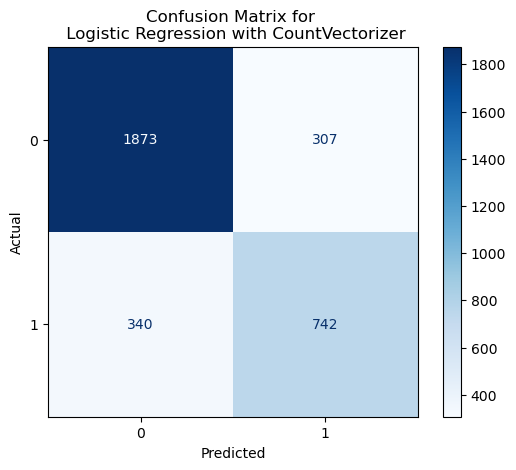

In [179]:
# generating standard confusion matrix for testing set
SVM_conf_matrix = plot_confusion_matrix(count_log_reg_baseline, X_test_count, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues)
SVM_conf_matrix.ax_.set_title('Confusion Matrix for \n Logistic Regression with CountVectorizer')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

From this confusion matrix, we can see that the True Negative rate is high, but the True Positive rate is much lower. **Let's normalize these values to get a better sense of this relationship.**

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


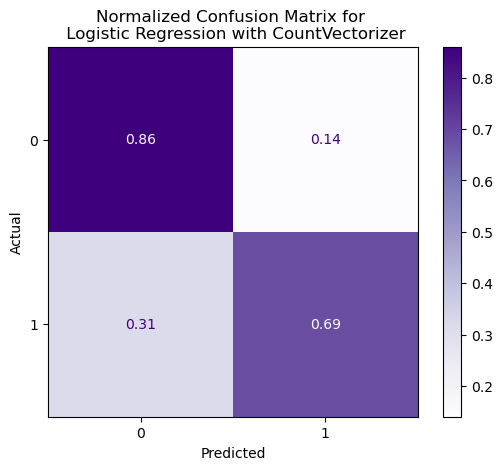

In [180]:
# generating normalized confusion matrix for testing set
SVM_conf_matrix = plot_confusion_matrix(count_log_reg_baseline, X_test_count, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Purples,
                                 normalize='true')
SVM_conf_matrix.ax_.set_title('Normalized Confusion Matrix for \n Logistic Regression with CountVectorizer')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

So as expected, the final model has a True Negative Rate of 86% and a True Positive Rate of 69%.

This is consistent with the final model's evaluation metrics, where it got a Recall of 0.739, aka the True Positive Rate. In this business context, we would ideally want as many True Positives as possible, because that would be identifying bullying tweets correctly. Therefore, this is where the final model could be improved.

Also, we can see that only 14% of predictions are False Positives. Which mean that they were classified as "Bullying tweets" when it's not. It's great that this amount is low, because site users tend to launch complaint reports when their content is over-flagged as bullying content when it's not.

Overall, the Recall of this model needs to be greatly improved, in addition to the F1 of 0.7048.

# Conclusion

The final model had an F1 of 0.7048 and Recall of 0.739. Although this project had extensive preprocessing and modeling iterations, there is still room for improvement.

It's important to understand why the model performed poorly and how that relates to the business problem. The F1 score was brought down by the "Bullying" label predictions. The model was able to predict 86% of the "Not Bullying" labels correctly, but could only predict 69% other label. 

**This performance is indicative of the two major roadblocks of the project:** 

1. Massive class imbalance of the dataset
2. Model's inability to "understand" the nuances of bullying content

The issue of class imbalance is manageable with preprocessing techniques and oversampling/undersampling techniques. However, identifying bullying is an overall problem that many major tech companies like Twitter, Facebook and Instagram are still struggling with.

This is because the line between Bullying(Hate Speech/Toxicity/Insults) and regular offensive language is so fine. It is often defined as abusive or threatening speech that expresses prejudice against a particular group, especially on the basis of race, religion or sexual orientation. Usually, the difference between hate speech and offensive language comes down to subtle context or diction.

# Next Steps

To further develop this project, here are some immediate next steps.

- Collect more potential "Bullying" data 
- Improve final model with different preprocessing techniques, such as removing offensive language as stop words
- Evaluate model with new tweets or other online forum data to see if it can generalize well
- LDA Topic Modeling with Gensim

**References** <br/>

[1] Lisa A. Chalaguine,( 2020, July 14 ),Getting Started With Text Analysis In Python,towardsdatascience,https://towardsdatascience.com/getting-started-with-text-analysis-in-python-ca13590eb4f7

[2] Naveen,( 2022, February 27 ),What is stopword in NLP,nomidl, https://www.nomidl.com/natural-language-processing/what-is-stop-word-in-nlp/#:~:text=Stop%20words%20are%20the%20most%20common%20words%20in,a%20text%20before%20it%20is%20processed%20for%20analysis.

[3] Alexander S. Gillis,( 2023, March ),Lemmatization,techtarget, https://www.techtarget.com/searchenterpriseai/definition/lemmatization

[4] Neri Van Otten,( 2022, December 9 ),Lemmatization-Everything you need to get started,spotintelligence,https://spotintelligence.com/2022/12/09/lemmatization/

[5] Prashant Sharma,( 2022, September 1 ),An Introduction to Stemming in Natural Language Processing,analyticsvidhya, https://www.analyticsvidhya.com/blog/2021/11/an-introduction-to-stemming-in-natural-language-processing <br/>

[6] https://www.kaggle.com/code/prakharprasad/twitter-hate-speech-classification/notebook<br/>

[7] https://towardsdatascience.com/imbalanced-data-in-classification-general-solution-case-study-169f2e18b017<br/>

[8] https://www.kaggle.com/code/subhajeetdas/twitter-hate-speech-detection-different-model<br/>

[9] International Journal of Scientific Research in Computer Science, Engineering and Information Technology,2021,https://doi.org/10.32628/CSEIT217381,br/>

[10] https://github.com/Subhajeet-Das/Twitter-Hate-Speech-Detection<br/>

[11]https://github.com/wblakecannon/ames<br/>

[12]https://github.com/dhavalpotdar/detecting-offensive-language-in-tweets<br/>

